In [1]:
from sympy import nextprime

def generate_prime_pairs(num_pairs, max_difference):
    """
    Generates pairs of prime numbers where the difference between the primes in each pair
    does not exceed a specified maximum difference.
    """
    prime_pairs = []
    current_prime = 2

    while len(prime_pairs) < num_pairs:
        next_prime = nextprime(current_prime)
        if next_prime - current_prime <= max_difference:
            prime_pairs.append((current_prime, next_prime))
        current_prime = next_prime

    return prime_pairs

# Generating two lists of prime pairs
num_pairs = 10  # number of prime pairs to generate for each list

# Finding the largest prime in the first list to set the max difference for the second list
first_list = generate_prime_pairs(num_pairs, float('inf'))
largest_prime_first_list = max(max(pair) for pair in first_list)

# Generating the second list with the max difference set as the largest prime of the first list
second_list = generate_prime_pairs(num_pairs, largest_prime_first_list)

print("First List:", first_list)
print("Second List:", second_list)


First List: [(2, 3), (3, 5), (5, 7), (7, 11), (11, 13), (13, 17), (17, 19), (19, 23), (23, 29), (29, 31)]
Second List: [(2, 3), (3, 5), (5, 7), (7, 11), (11, 13), (13, 17), (17, 19), (19, 23), (23, 29), (29, 31)]


In [3]:
import sympy

def generate_alternating_prime_pairs(num_pairs, max_prime):
    """
    Generates two lists of prime pairs such that consecutive primes alternate between the lists.
    For example, if the first list starts with (2, X), the second list will start with (3, Y), and so on.
    """
    # Generate a list of primes below the maximum value
    primes = list(sympy.primerange(2, max_prime))
    list_one = []
    list_two = []

    # Alternating between the lists for consecutive primes
    for i in range(len(primes)):
        if len(list_one) >= num_pairs and len(list_two) >= num_pairs:
            break

        # Skip one prime for the pair
        if i % 2 == 0 and len(list_one) < num_pairs:
            list_one.append((primes[i], sympy.nextprime(primes[i+1])))
        elif i % 2 == 1 and len(list_two) < num_pairs:
            list_two.append((primes[i], sympy.nextprime(primes[i+1])))

    return list_one, list_two

# Generating the lists with alternating consecutive primes
max_prime = 200  # Increased max prime to ensure enough pairs
num_pairs = 10

list_one, list_two = generate_alternating_prime_pairs(num_pairs, max_prime)

print("List One:", list_one)
print("List Two:", list_two)


List One: [(2, 5), (5, 11), (11, 17), (17, 23), (23, 31), (31, 41), (41, 47), (47, 59), (59, 67), (67, 73)]
List Two: [(3, 7), (7, 13), (13, 19), (19, 29), (29, 37), (37, 43), (43, 53), (53, 61), (61, 71), (71, 79)]


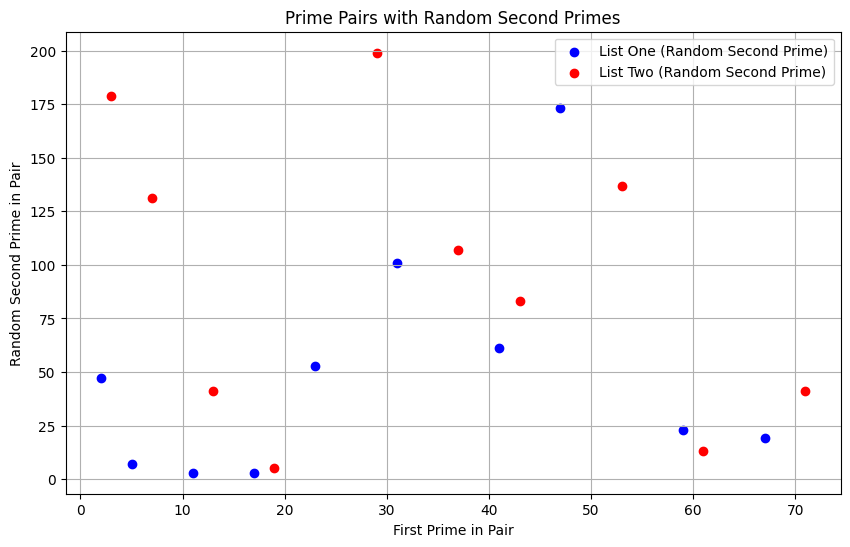

In [4]:
import sympy
import random
import matplotlib.pyplot as plt

def generate_alternating_prime_pairs_with_random_second(num_pairs, max_prime):
    """
    Generates two lists of prime pairs such that consecutive primes alternate between the lists as the first element,
    and the second element is a random prime.
    """
    # Generate a list of primes below the maximum value
    primes = list(sympy.primerange(2, max_prime))
    list_one = []
    list_two = []

    # Alternating between the lists for consecutive primes as first elements
    for i in range(len(primes)):
        if len(list_one) >= num_pairs and len(list_two) >= num_pairs:
            break

        # Select a random second prime
        random_second_prime = random.choice([p for p in primes if p != primes[i]])

        if i % 2 == 0 and len(list_one) < num_pairs:
            list_one.append((primes[i], random_second_prime))
        elif i % 2 == 1 and len(list_two) < num_pairs:
            list_two.append((primes[i], random_second_prime))

    return list_one, list_two

# Generating the lists with alternating consecutive primes as first elements and random primes as second elements
max_prime = 200  # Maximum prime for the range
num_pairs = 10

list_one_random, list_two_random = generate_alternating_prime_pairs_with_random_second(num_pairs, max_prime)

# Extracting the x and y coordinates for plotting the new lists
x1_random, y1_random = zip(*list_one_random)
x2_random, y2_random = zip(*list_two_random)

# Plotting the points with random second primes
plt.figure(figsize=(10, 6))
plt.scatter(x1_random, y1_random, color='blue', label='List One (Random Second Prime)')
plt.scatter(x2_random, y2_random, color='red', label='List Two (Random Second Prime)')
plt.title('Prime Pairs with Random Second Primes')
plt.xlabel('First Prime in Pair')
plt.ylabel('Random Second Prime in Pair')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

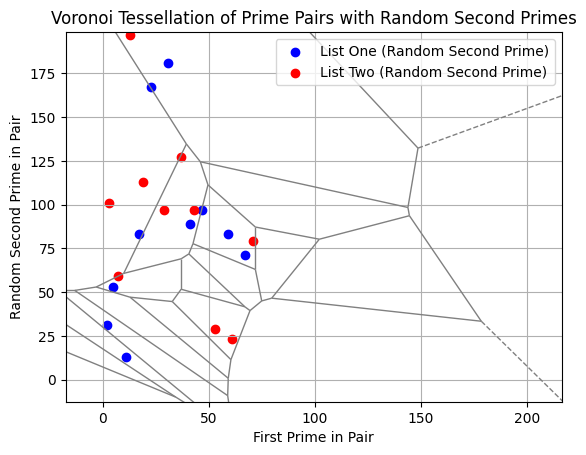

In [2]:
import sympy
import random
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_alternating_prime_pairs_with_random_second(num_pairs, max_prime):
    """
    Generates two lists of prime pairs such that consecutive primes alternate between the lists as the first element,
    and the second element is a random prime.
    """
    # Generate a list of primes below the maximum value
    primes = list(sympy.primerange(2, max_prime))
    list_one = []
    list_two = []

    # Alternating between the lists for consecutive primes as first elements
    for i in range(len(primes)):
        if len(list_one) >= num_pairs and len(list_two) >= num_pairs:
            break

        # Select a random second prime
        random_second_prime = random.choice([p for p in primes if p != primes[i]])

        if i % 2 == 0 and len(list_one) < num_pairs:
            list_one.append((primes[i], random_second_prime))
        elif i % 2 == 1 and len(list_two) < num_pairs:
            list_two.append((primes[i], random_second_prime))

    return list_one, list_two

# Generating the lists with alternating consecutive primes as first elements and random primes as second elements
max_prime = 200  # Maximum prime for the range
num_pairs = 10

list_one_random, list_two_random = generate_alternating_prime_pairs_with_random_second(num_pairs, max_prime)

# Extracting the x and y coordinates for plotting the new lists
x1_random, y1_random = zip(*list_one_random)
x2_random, y2_random = zip(*list_two_random)

# Combining the coordinates from both lists for Voronoi tessellation
combined_coordinates = x1_random + y1_random + x2_random + y2_random

# Generating Voronoi tessellation
vor = Voronoi(list(zip(combined_coordinates[::2], combined_coordinates[1::2])))

# Plotting the Voronoi diagram
plt.figure(figsize=(12, 8))
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='gray')
plt.scatter(x1_random, y1_random, color='blue', label='List One (Random Second Prime)')
plt.scatter(x2_random, y2_random, color='red', label='List Two (Random Second Prime)')
plt.title('Voronoi Tessellation of Prime Pairs with Random Second Primes')
plt.xlabel('First Prime in Pair')
plt.ylabel('Random Second Prime in Pair')
plt.legend()
plt.grid(True)
plt.show()

